In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [ ]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
57255,9,CASH_OUT,54845.13,C381469371,149670.00,94824.87,C996916993,104939.00,1392422.25,0,0
846144,41,CASH_OUT,108041.66,C1511663855,61108.00,0.00,C1535043772,1471131.11,1579172.78,0,0
956891,44,CASH_IN,296715.71,C1971744631,14034.56,310750.27,C1566512642,879991.86,760549.41,0,0
417724,18,PAYMENT,10649.25,C2001478701,16502.13,5852.88,M1021146661,0.00,0.00,0,0
448898,19,CASH_IN,364688.98,C1215628675,7681145.81,8045834.79,C849444727,1633208.12,1268519.14,0,0


In [ ]:
df.isFlaggedFraud.value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.shape

(1048575, 11)

In [ ]:
df.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [ ]:
type=df['type'].value_counts()

In [ ]:
transactions=type.index

In [ ]:
quantity=type.values

In [ ]:
import plotly.express as px
px.pie(df,values=quantity,names=transactions,hole=0.4,title="Distribution of Transaction Type")

In [ ]:
df = pd.get_dummies(df, columns=['type'], prefix='', prefix_sep='')
df = df.rename(columns={'CASH_OUT': 'type_CASH_OUT', 'CASH_IN': 'type_CASH_IN', 'DEBIT': 'type_DEBIT', 'PAYMENT': 'type_PAYMENT', 'TRANSFER': 'type_TRANSFER'})
print(df)

         step     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1    9839.64  C1231006815      170136.00       160296.36   
1           1    1864.28  C1666544295       21249.00        19384.72   
2           1     181.00  C1305486145         181.00            0.00   
3           1     181.00   C840083671         181.00            0.00   
4           1   11668.14  C2048537720       41554.00        29885.86   
...       ...        ...          ...            ...             ...   
1048570    95  132557.35  C1179511630      479803.00       347245.65   
1048571    95    9917.36  C1956161225       90545.00        80627.64   
1048572    95   14140.05  C2037964975       20545.00         6404.95   
1048573    95   10020.05  C1633237354       90605.00        80584.95   
1048574    95   11450.03  C1264356443       80584.95        69134.92   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0        M1979787155            0.00            0.00  

In [ ]:
df.sample(5)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
692263,36,9234.98,C932348524,12839.43,3604.45,M1828931898,0.00,0.00,0,0,0,0,0,1,0
224443,14,37292.51,C1880097201,0.00,0.00,M2109740334,0.00,0.00,0,0,0,0,0,1,0
836964,41,10317.92,C2066659843,90695.79,80377.86,M1203913647,0.00,0.00,0,0,0,0,0,1,0
996992,45,162071.69,C58617638,32514.00,194585.69,C428051887,1009145.37,847073.68,0,0,1,0,0,0,0
872653,42,72338.57,C177876504,419913.08,492251.65,C1206421095,99755.70,27417.13,0,0,1,0,0,0,0


<ipython-input-15-8fde2de2d3c3>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

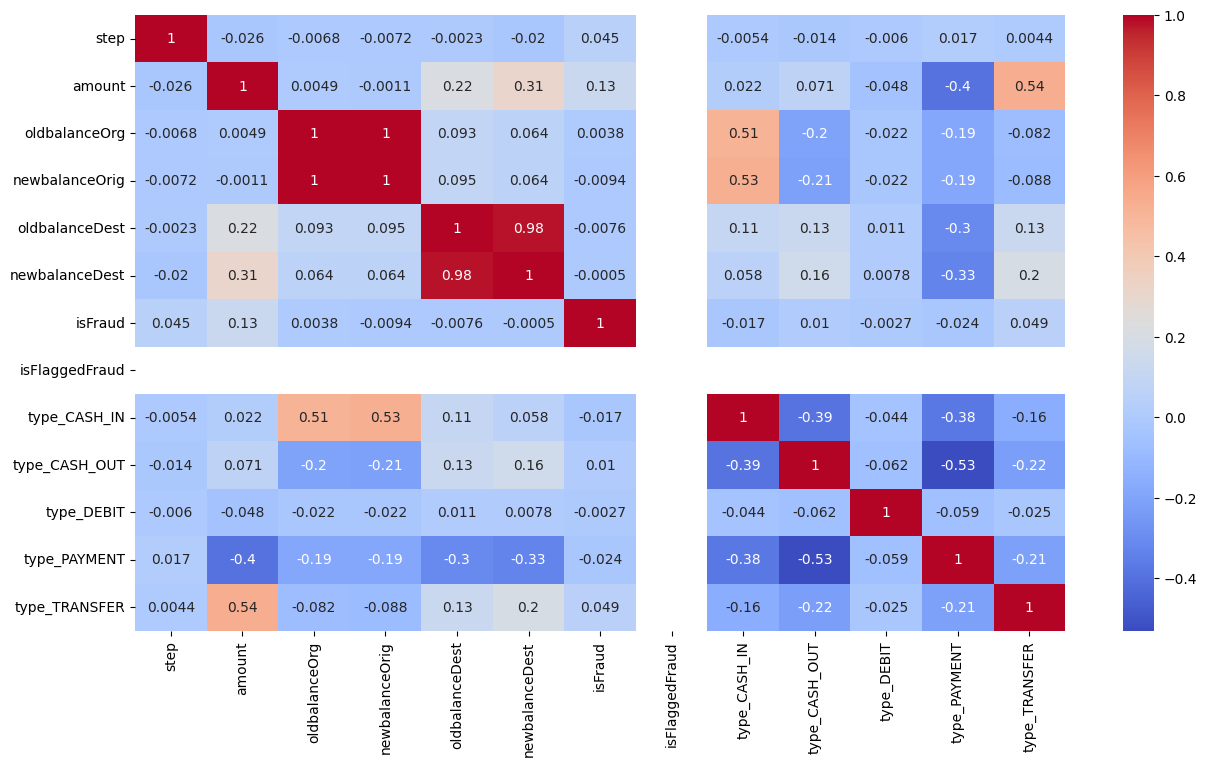

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
df = df.drop('isFlaggedFraud', axis = 1)

In [ ]:
x=df.drop(['isFraud','step', 'amount', 'nameOrig', 'nameDest'], axis = 1)

In [ ]:
y=df['isFraud']

In [ ]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [ ]:
x

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,0.00,0.00,0.00,0,0,0,0,1
3,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1048570,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [ ]:
y.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [ ]:
class_1_data = df[df['isFraud'] == 1]

# Sample 1,500 rows from class 2 (assuming class 2 contains more than 1,500 rows)
class_2_data = df[df['isFraud'] == 0].sample(n=1500, random_state=42)  # Adjust random_state as needed

# Concatenate the two dataframes to get the final 1,500 rows
final_data = pd.concat([class_1_data, class_2_data])

# Reset the index (optional)
final_data = final_data.reset_index(drop=True)

In [ ]:
final_data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
2,1,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0,0,0,0,1
3,1,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0,1,0,0,0
4,1,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,9,3551.02,C952509348,2283718.36,2280167.35,M1291740311,0.00,0.00,0,0,0,0,1,0
2638,12,363002.38,C143001948,22384.00,0.00,C1406193485,24200000.00,24500000.00,0,0,1,0,0,0
2639,38,11480.06,C1086787928,4914479.78,4925959.84,C2132845536,970027.84,1271549.04,0,1,0,0,0,0
2640,39,350519.70,C458159133,0.00,0.00,C218997206,2365125.76,2852622.54,0,0,1,0,0,0


In [ ]:
final_data.isFraud.value_counts()

0    1500
1    1142
Name: isFraud, dtype: int64

In [ ]:
x = final_data.drop(['isFraud','step', 'amount', 'nameOrig', 'nameDest'],axis=1)

In [ ]:
y = final_data['isFraud']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

In [ ]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
model.score(xtest,ytest)

0.9338374291115312

In [ ]:
pred = model.predict(xtest)

<Axes: >

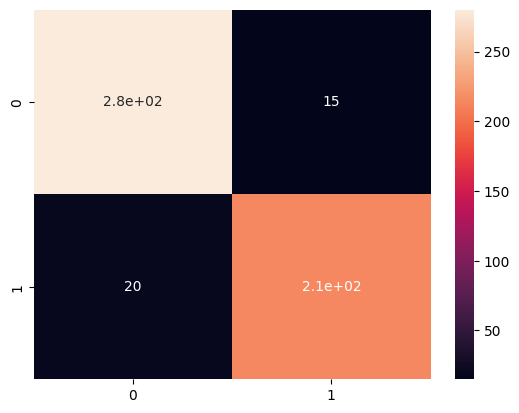

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(ytest, pred),annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
rf.score(xtest,ytest)

0.9527410207939508

In [ ]:
y_pred = rf.predict(xtest)

<Axes: >

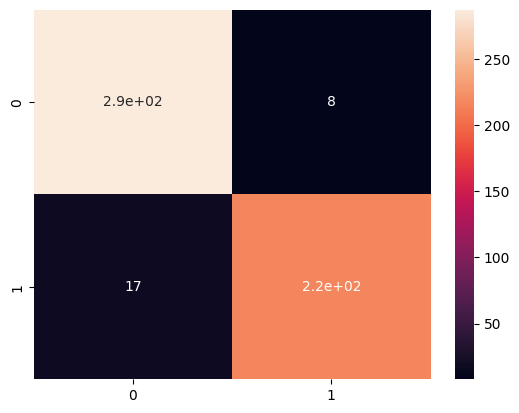

In [ ]:
sns.heatmap(confusion_matrix(ytest, y_pred),annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
rf.score(xtest,ytest)

0.9565217391304348

In [ ]:
y_pred = rf.predict(xtest)

<Axes: >

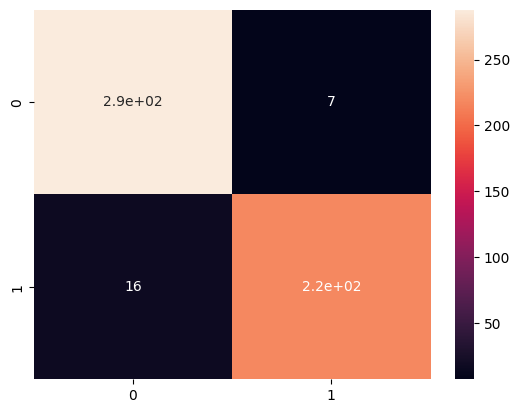

In [ ]:
sns.heatmap(confusion_matrix(ytest, y_pred),annot=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(xtrain, ytrain)

y_pred = knn.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(ytrain, knn.predict(xtrain))
knn_test_acc = accuracy_score(ytest, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

Training accuracy of KNN is : 0.8906767628963559
Test accuracy of KNN is : 0.8979206049149339
[[286   9]
 [ 45 189]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       295
           1       0.95      0.81      0.88       234

    accuracy                           0.90       529
   macro avg       0.91      0.89      0.89       529
weighted avg       0.90      0.90      0.90       529



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(xtrain, ytrain)

y_pred = rand_clf.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(ytrain, rand_clf.predict(xtrain))
rand_clf_test_acc = accuracy_score(ytest, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

Training accuracy of Random Forest is : 0.9820160908660672
Test accuracy of Random Forest is : 0.9508506616257089
[[288   7]
 [ 19 215]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       295
           1       0.97      0.92      0.94       234

    accuracy                           0.95       529
   macro avg       0.95      0.95      0.95       529
weighted avg       0.95      0.95      0.95       529

